In [1]:

import types
import pandas as pd
from ibm_botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_8c14de1d42f947c2812d9d92c44fc593 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='dkRewe8bWqDvG_wGkUpZZWfiK76sgOynJi2_lGtlmIOW',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_8c14de1d42f947c2812d9d92c44fc593.get_object(Bucket='default-donotdelete-pr-ijbvuypsfmigjt',Key='winequality-red.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


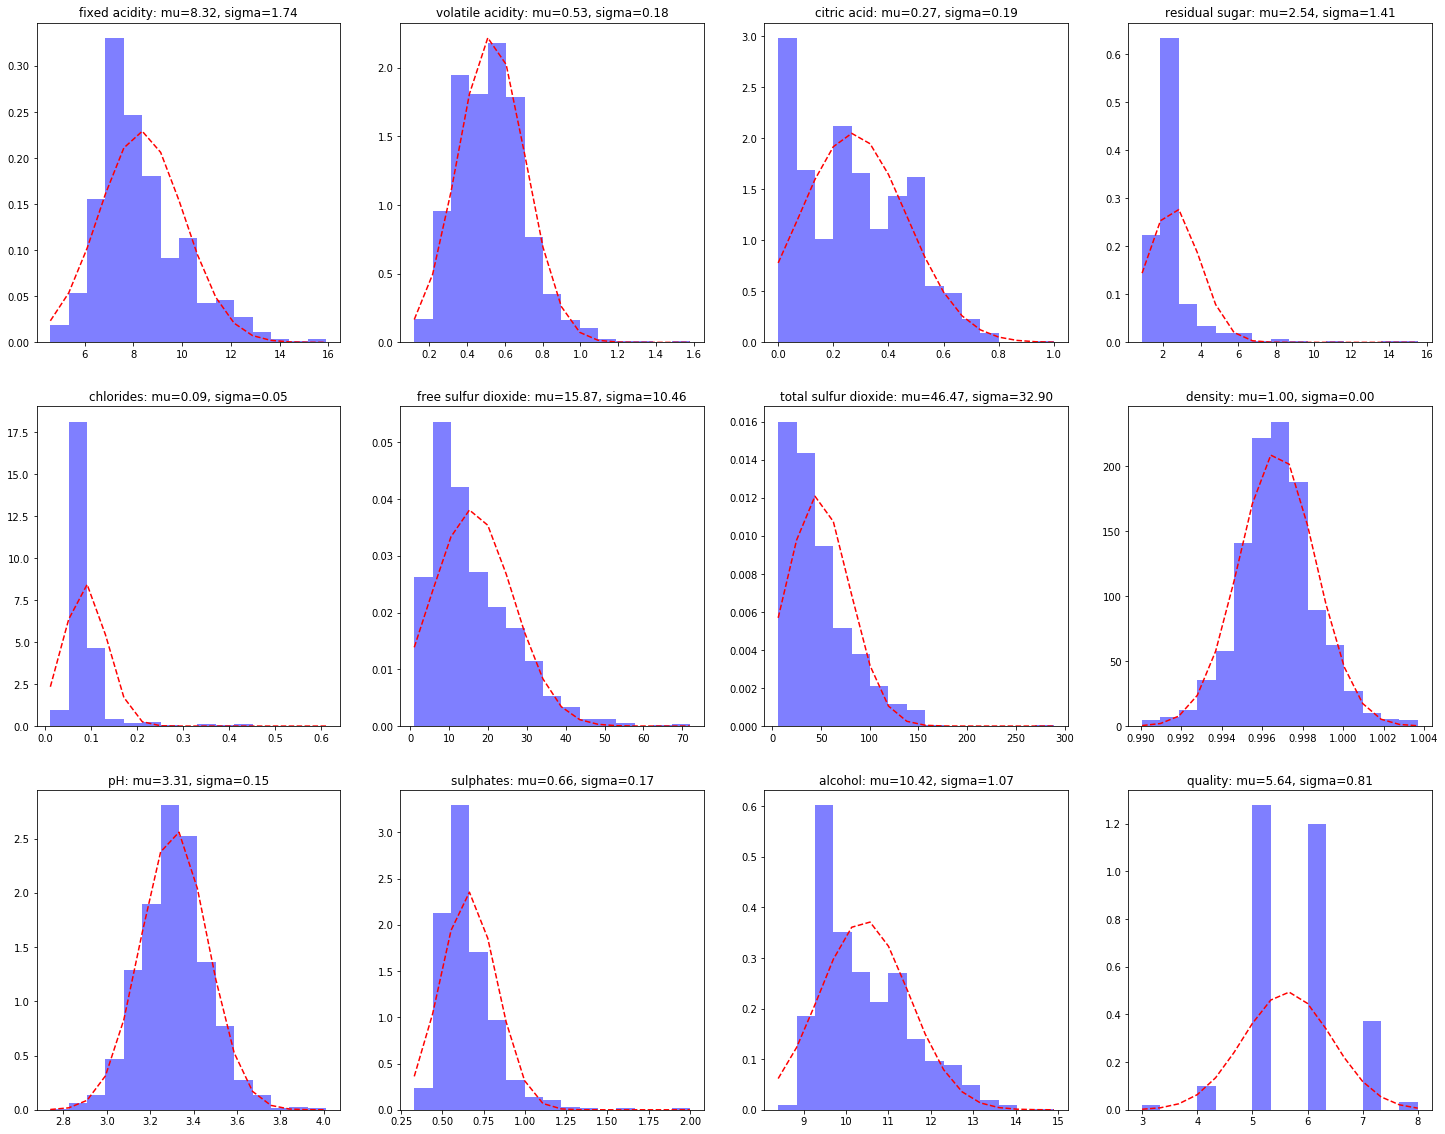

In [3]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i in range(1, len(df.columns)+1):
    ax = fig.add_subplot(3, 4, i)

    mu = df[df.columns[i-1]].mean()
    sigma = df[df.columns[i-1]].std()
    ax.set_title(df.columns[i-1] + ': mu='+str('{0:.2f}'.format(mu))+', sigma=' + str('{0:.2f}'.format(sigma)), fontsize=12)

    num_bins = 15
    n, bins, patches = ax.hist(df[df.columns[i-1]], num_bins, normed=1, facecolor='blue', alpha=0.5)

    # add a 'best fit' line
    y = mlab.normpdf(bins, mu, sigma)
    ax.plot(bins, y, 'r--')


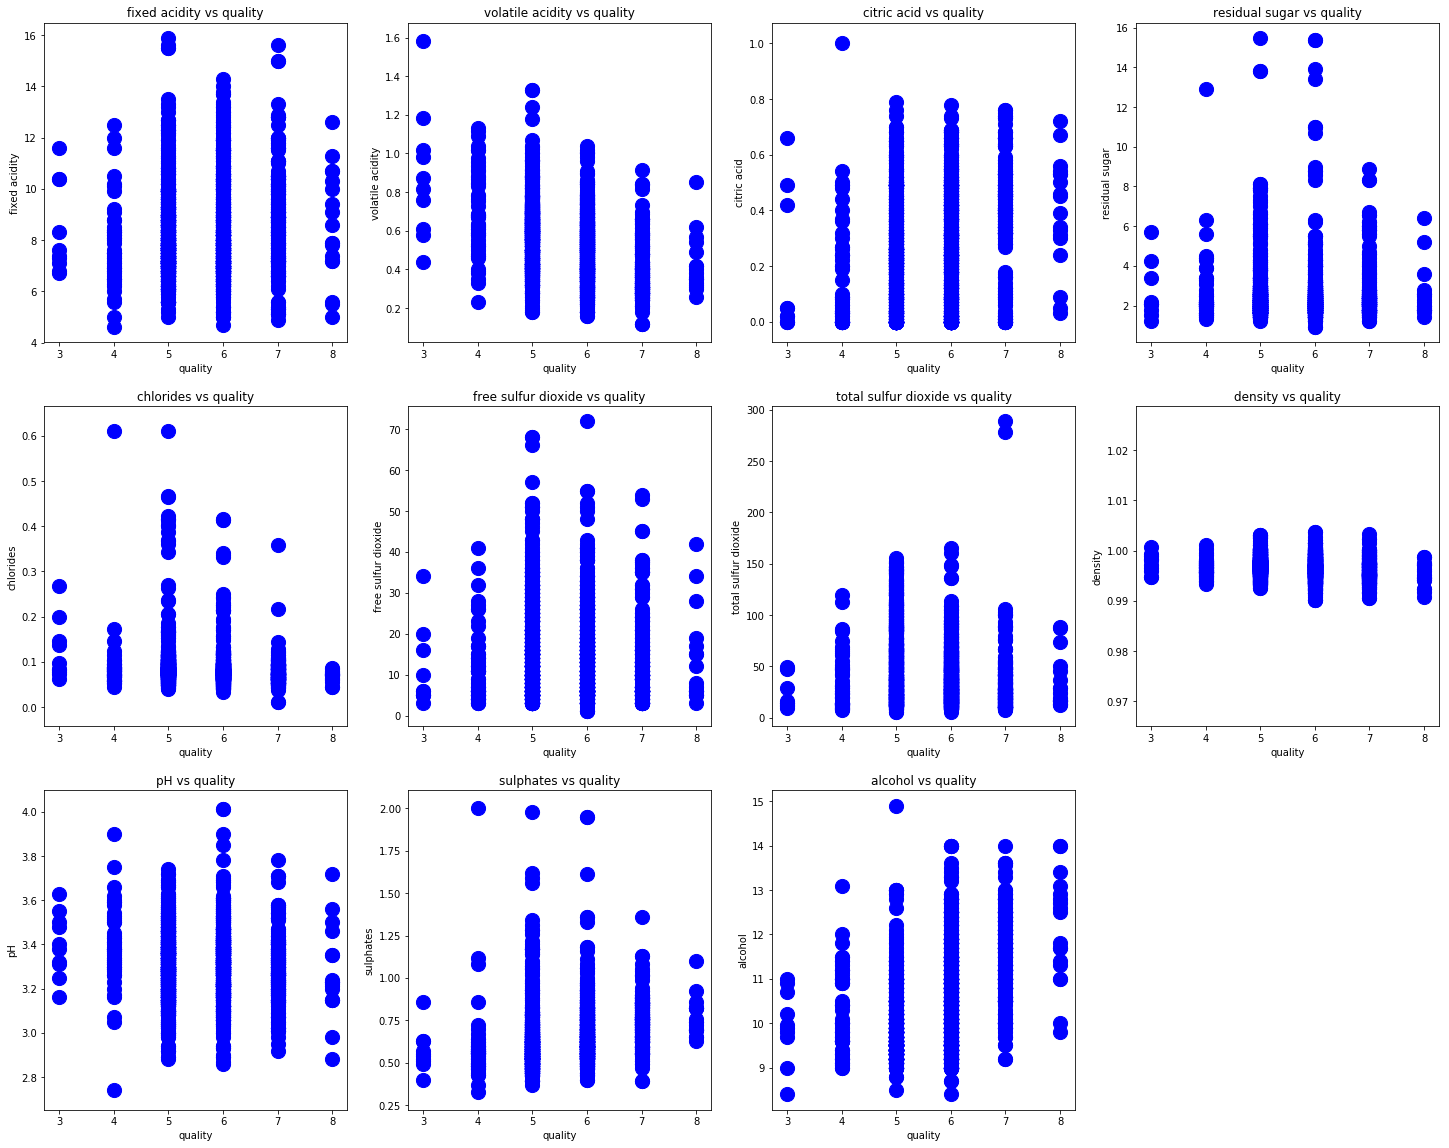

In [4]:
fig = plt.figure(figsize=(25,20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i in range(1, len(df.columns)):
    ax = fig.add_subplot(3, 4, i)
    ax.set_title(df.columns[i-1] + ' vs quality', fontsize=12)
    ax.set_xlabel('quality')
    ax.set_ylabel(df.columns[i-1])    
    ax.scatter(df['quality'], df[df.columns[i-1]], facecolor='blue', s=200)